In [21]:
# Load library
import cv2
import numpy as np
from matplotlib import pyplot as plt

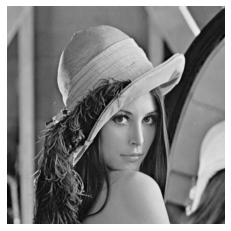

In [22]:
# Load image as grayscale
image = cv2.imread("Lenna_test_image.png", cv2.IMREAD_GRAYSCALE)

# Show image
plt.imshow(image, cmap="gray"), plt.axis("off")
plt.show()

In [ ]:
# Show data type
type(image)

numpy.ndarray

In [ ]:
# Show image data
image

array([[169, 169, 168, ..., 175, 162, 138],
       [169, 169, 168, ..., 175, 162, 138],
       [169, 169, 168, ..., 175, 162, 138],
       ...,
       [ 53,  53,  59, ..., 115, 112, 114],
       [ 53,  53,  64, ..., 117, 118, 122],
       [ 53,  53,  64, ..., 117, 118, 122]], dtype=uint8)

In [ ]:
# Show dimensions
image.shape

(512, 512)

In [ ]:
# Show first pixel
image[0,0]

169

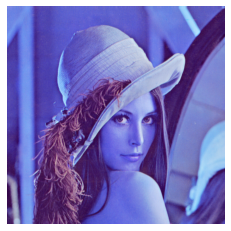

In [ ]:
# Load image in color
image_bgr = cv2.imread("Lenna_test_image.png", cv2.IMREAD_COLOR)

# Show image
plt.imshow(image_bgr), plt.axis("off")
plt.show()

In [ ]:
# Show pixel
image_bgr[0,0]

array([125, 137, 226], dtype=uint8)

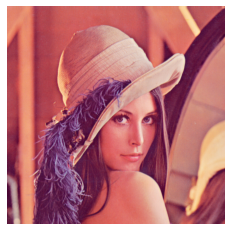

In [ ]:
# Convert to RGB
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
# Show image
plt.imshow(image_rgb), plt.axis("off")
plt.show()

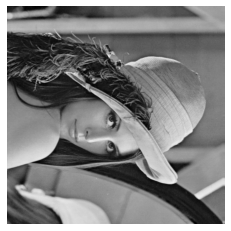

In [24]:
# Using cv2.rotate() method
# Using cv2.ROTATE_90_CLOCKWISE rotate
# by 90 degrees clockwise
image_rotated = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
  
# Show image
plt.imshow(image_rotated, cmap="gray"), plt.axis("off")
plt.show()

In [ ]:
# Load image as grayscale
image = cv2.imread("Lenna_test_image.png", cv2.IMREAD_GRAYSCALE)
# Save image
cv2.imwrite("Lenna_test_image_grey.png", image)

True

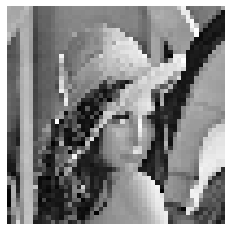

In [ ]:
# Resize image to 50 pixels by 50 pixels
image_50x50 = cv2.resize(image, (50, 50))
# View image
plt.imshow(image_50x50, cmap="gray"), plt.axis("off")
plt.show()

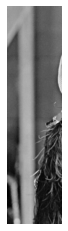

In [ ]:
#Cropping image. You want to remove the outer portion of the image to change its dimensions.
'''
The image is encoded as a two-dimensional NumPy array, so we can crop the image
easily by slicing the array:
'''
# Select first half of the columns and all rows
image_cropped = image[:,:128]
# Show image
plt.imshow(image_cropped, cmap="gray"), plt.axis("off")
plt.show()

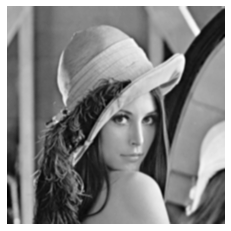

In [ ]:
#Blurring an Image. You want to smooth out an image.
'''
To blur an image, each pixel is transformed to be the average value of its neighbors.
This neighbor and the operation performed are mathematically represented as a kernel. 
The size of this kernel determines
the amount of blurring, with larger kernels producing smoother images.
'''

# Blur image
image_blurry = cv2.blur(image, (5,5))
# Show image
plt.imshow(image_blurry, cmap="gray"), plt.axis("off")
plt.show()

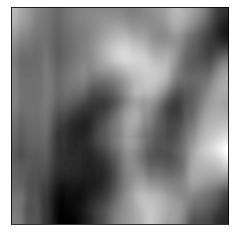

In [ ]:
#To highlight the effect of kernel size, here is the same blurring with a 100 × 100 kernel:

# Blur image
image_very_blurry = cv2.blur(image, (100,100))
# Show image
plt.imshow(image_very_blurry, cmap="gray"), plt.xticks([]), plt.yticks([])
plt.show()

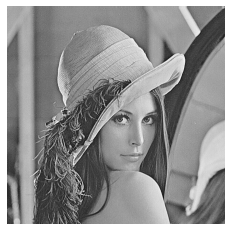

In [ ]:
#To sharpen an image.Create a kernel that highlights the target pixel. Then apply it to the image using filter2D:

# Load image as grayscale
image = cv2.imread("Lenna_test_image.png", cv2.IMREAD_GRAYSCALE)
# Create kernel
kernel = np.array([[0, -1, 0],[-1, 5,-1],[0, -1, 0]])
# Sharpen image
image_sharp = cv2.filter2D(image, -1, kernel)
# Show image
plt.imshow(image_sharp, cmap="gray"), plt.axis("off")
plt.show()

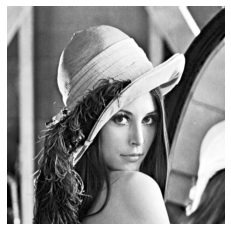

In [ ]:
#To increase the contrast between pixels in an image.
'''
Histogram equalization is a tool for image processing that can make objects and
shapes stand out. When we have a grayscale image, we can apply OpenCV’s equalizeHist directly on the image:
'''
# Enhance image
image_enhanced = cv2.equalizeHist(image)
# Show image
plt.imshow(image_enhanced, cmap="gray"), plt.axis("off")
plt.show()

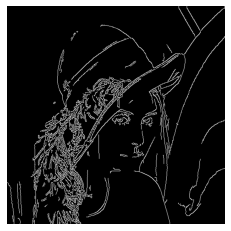

In [ ]:
#To detect edges Use an edge detection technique like the Canny edge detector:

# Load image as grayscale
image_gray = cv2.imread("Lenna_test_image.png", cv2.IMREAD_GRAYSCALE)

# Calculate median intensity
median_intensity = np.median(image_gray)

# Set thresholds to be one standard deviation above and below median intensity
lower_threshold = int(max(0, (1.0 - 0.33) * median_intensity))
upper_threshold = int(min(255, (1.0 + 0.33) * median_intensity))

# Apply canny edge detector
image_canny = cv2.Canny(image_gray, lower_threshold, upper_threshold)
# Show image
plt.imshow(image_canny, cmap="gray"), plt.axis("off")
plt.show()

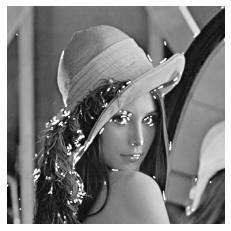

In [ ]:
'''
To detect the corners in an image.Use OpenCV’s implementation of the Harris corner detector, cornerHarris:
'''
# Load image as grayscale
image_bgr = cv2.imread("Lenna_test_image.png")
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)
image_gray = np.float32(image_gray)

# Set corner detector parameters
block_size = 2
aperture = 29
free_parameter = 0.04

# Detect corners
detector_responses = cv2.cornerHarris(image_gray, block_size, aperture, free_parameter)

# Large corner markers
detector_responses = cv2.dilate(detector_responses, None)

# Only keep detector responses greater than threshold, mark as white
threshold = 0.02
image_bgr[detector_responses > threshold * detector_responses.max()] = [255,255,255]

# Convert to grayscale
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

# Show image
plt.imshow(image_gray, cmap="gray"), plt.axis("off")
plt.show()